#  <a href="#C1"> 1. Importation de jeu de données propres </a>

#  2.  Analyse uni-varié des indicateurs 

- <a href="#C2"> 2.1 Stats Descriptives (quantis) </a>
- <a href="#C3"> 2.2 Analyse du Produits </a>
  - 2.2.1 Distribution de prix
  - 2.2.2 Prix de produits par catégorie 
  - 2.2.3 Nombre de produits par catégorie
- <a href="#c4"> 2.3 Analyse de clients </a>
  - 2.3.1 Sexe de clients
  - 2.3.2 Age des clients
  - 2.3.3 Répartitions des clients par classe d'âge
- <a href="#C5"> 2.4 Analyse du nombre d'achats </a>
  - 2.4.1 Nombre d'achats par client
  - 2.4.2 Nombre d'achats par produit
- <a href="#C6"> 2.5 Analyse du Chiffre d'Affaire (CA) </a>
  - 2.5.1 Le chiffre d'affaire total CA
  - 2.5.2 CA par catégorie de produit vendu
  - 2.5.3 CA par sexe de clients acheteurs
  - 2.5.4 CA par produit
  - 2.5.5 CA par client
- <a href="#C7"> 2.6 Analyse du panier moyen </a>

 
# 3. Analyse bi-variés des indicateurs 

- <a href="#C7"> 3.1 Sexe client / Catégorie livres achetés </a>
- <a href="#C8"> 3.2 Classe Age client / Catégorie livres achetés </a>
- <a href="#C9"> 3.3 Age client / Catégorie livres achetés </a>
- <a href="#C10"> 3.4 Age client / Montant total des achats </a>
- <a href="#C11"> 3.5 Age client / Fréquence d'achat </a>
- <a href="#C12"> 3.6 Age client / Panier moyen </a>
       
   
# 4. Discussions & Perspectives 

- <a href="#C13"> 4.1 Evolution temporelle? </a>
- <a href="#C14"> 4.2 Perspectives </a>
     

# <a name="#C1"> <font color='indiancian'>  1. Importation de jeu de données propres </a> </font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from google.colab import drive


In [4]:
drive.mount('/content/drive')
df_all=pd.read_csv('drive/MyDrive/Data_ResterLivres/Data.csv')

Mounted at /content/drive


In [60]:

df_all['sex'] = df_all['sex'].astype('string')
df_all['categ'] = df_all['categ'].astype('string')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   price       336816 non-null  float64
 5   categ       336816 non-null  string 
 6   sex         336816 non-null  string 
 7   birth       336816 non-null  int64  
 8   year        336816 non-null  int64  
 9   age         336816 non-null  int64  
 10  classe_age  336816 non-null  object 
dtypes: float64(1), int64(3), object(5), string(2)
memory usage: 28.3+ MB


# <font color='indiancian'> 2. Analyse uni-varié </font>

# <a name="#C2"> 2.1 statistiques descriptives </a>

In [6]:
df_all.describe()


,price,birth,year,age
count,336816.000000,336816.000000,336816.000000,336816.000000
mean,17.213075,1977.823396,2021.174822,43.351426
std,17.853124,13.523923,0.379816,13.532093
min,0.620000,1929.000000,2021.000000,17.000000
25%,8.610000,1971.000000,2021.000000,34.000000
50%,13.900000,1980.000000,2021.000000,42.000000
75%,18.990000,1987.000000,2021.000000,51.000000
max,300.000000,2004.000000,2022.000000,93.000000


**Bilan**
- Les produits vendus ont des prix entre 0.61 et  300 euros.
- 75% des produits vendus sont au prix moins que 19 euros.
- Les clients en ligne ont des ages entre 18 et 93 ans.


 # <a name="#C3"> 2.2 Analyse de produits</a>

## 2.2.1 Distribution de prix 

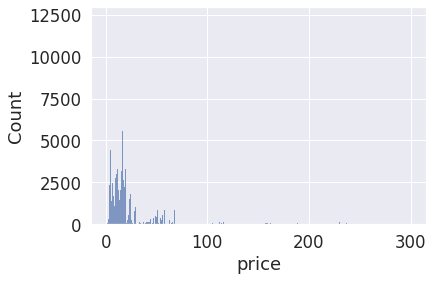

In [7]:
sns.set(font_scale=1.5)
sns.histplot(df_all['price'])

plt.savefig('countplot_price.png')



## 2.2.2 Le prix par catégorie de produits

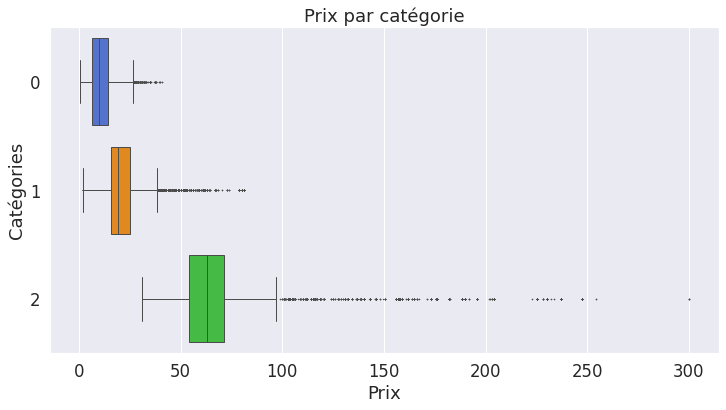

In [8]:
plt.figure(figsize=(12,6))
colors=['royalblue', 'darkorange', 'limegreen']
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df_all.price, y=df_all.categ, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='Prix', ylabel='Catégories', title='Prix par catégorie')
plt.savefig('Boxplot Prix-Categ.png', bbox_inches='tight')
plt.show()

##2.2.3 Répartitions de nombre de produits par catégorie

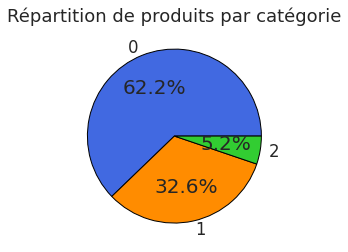

nombre de produits dans chaque catégorie 0    209529
1    109735
2     17552
Name: categ, dtype: Int64


In [9]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title("Répartition de produits par catégorie")
labels = ['0','1','2']
colors = ['royalblue', 'darkorange', 'limegreen']

plt.pie(df_all.categ.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig("Pie Nproduits-categ.png", bbox_inches='tight')
plt.show()
print('nombre de produits dans chaque catégorie',df_all.categ.value_counts())

# <a name="#C4"> 2.3 Analyse des clients </a>

## 2.3.1 Sexe des clients

---



In [10]:


print('nombre de client selon sexe \n',df_all.sex.value_counts())
print('pourcentage de clients selon sexe \n',round(df_all.sex.value_counts()/df_all.shape[0]*100,2))


nombre de client selon sexe 
 m    169241
f    167575
Name: sex, dtype: Int64
pourcentage de clients selon sexe 
 m    50.25
f    49.75
Name: sex, dtype: Float64


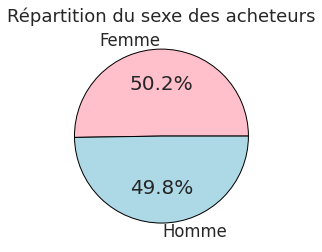

In [11]:
plt.rcParams['font.size'] = 20
plt.figure()
plt.title('Répartition du sexe des acheteurs')
labels = ['Femme','Homme']
colors = ['pink','lightblue']

plt.pie(df_all.sex.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Pie clients sex.png', bbox_inches='tight')
plt.show()

## 2.3.2 Age de clients

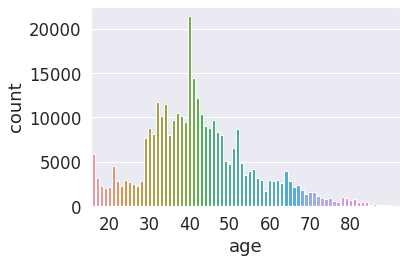

<Figure size 432x288 with 0 Axes>

In [12]:
#from matplotlib.ticker import FixedLocator, FixedFormatter
#x_formatter = FixedFormatter([
    #"18", "30", "40", "50","60","70","80"])
#x_locator = FixedLocator([0, 13, 24, 35, 46, 57, 68])
#ax.xaxis.set_major_formatter(x_formatter)
#ax.xaxis.set_major_locator(x_locator)

sns.set(font_scale=1.5)
ax = sns.countplot(x="age", data=df_all,orient='h')
ax.set_xticks([4,14,24,34,44,54,64],minor=False)
ax.set_xticklabels(["20","30","40","50","60","70","80"])
plt.tight_layout()
plt.show()
plt.savefig('countplot_age.png')



**L'âge de clients par sex**

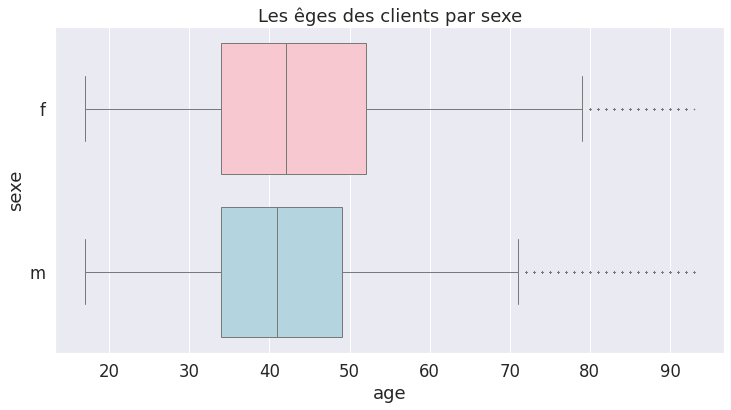

In [13]:
plt.figure(figsize=(12,6))
colors=['pink','lightblue']
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df_all.age, y=df_all.sex, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='age', ylabel='sexe', title='Les êges des clients par sexe')
plt.savefig('Boxplot sexe_age.png', bbox_inches='tight')
plt.show()

## 2.3.3 Répartition des clients par classe d'ages



In [14]:
# Tranches d'âge
df_all['classe_age'] = '18-30'
df_all['classe_age'].loc[df_all[df_all['age']>=30].index] = '30-50'
df_all['classe_age'].loc[df_all[df_all['age']>=50].index] = '+50'

df_all.tail(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,age,classe_age
336806,0_1618,2021-10-29 14:41:04.381619,s_111837,c_3308,3.95,0,f,1991,2021,30,30-50
336807,0_1209,2021-10-29 14:13:38.229490,s_111837,c_3308,8.99,0,f,1991,2021,30,30-50
336808,2_160,2022-01-01 11:53:39.954431,s_143361,c_5967,62.83,2,f,2003,2022,19,18-30
336809,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,149.74,2,f,2003,2021,18,18-30
336810,2_181,2021-08-05 23:36:00.315963,s_71886,c_6837,57.99,2,f,1995,2021,26,18-30
336811,2_147,2021-12-05 00:31:15.530765,s_129519,c_4540,181.99,2,m,2003,2021,18,18-30
336812,2_19,2021-04-03 07:31:36.674313,s_15300,c_5139,69.99,2,f,2000,2021,21,18-30
336813,2_37,2021-08-07 07:54:38.543403,s_72476,c_5139,48.99,2,f,2000,2021,21,18-30
336814,1_493,2021-06-04 11:35:01.467509,s_43928,c_4679,10.99,1,f,1930,2021,91,+50
336815,2_110,2021-08-19 08:46:07.018249,s_77793,c_8005,62.25,2,f,1955,2021,66,+50


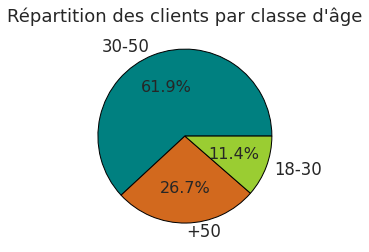

In [15]:
plt.rcParams['font.size'] = 16
plt.figure()
plt.title('Répartition des clients par classe d\'âge')
labels = ['30-50','+50','18-30']
colors = ['teal','chocolate','yellowgreen']

plt.pie(df_all.classe_age.value_counts(), labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig("Pie Classe d'âge.png", bbox_inches='tight')
plt.show()




# <a name="#C5"> 2.4 Analyse du nombre d'achats </a>

##2.4.1 Nombre d'achats par client

In [16]:
# Création du df des clients et le nombre de leurs achats
df_clients_nachats=df_all[['client_id', 'session_id']].groupby(['client_id'], as_index=False).count()
df_clients_nachats=df_clients_nachats.rename(columns={'session_id':'nb_achats'})
df_clients_nachats.head()

nb_achat_client = df_clients_nachats['nb_achats'].values


**Courbe de Lorenz**

In [17]:
# Calcul de lorenz
def lorenz_gini(varrs):
  #Tri des individus dans l'ordre croissant des valeurs de la variable, 
  #Calcul de la somme cumulée et normalisation en divisant par la somme des observations
  n=len(varrs)
  lorenz= np.cumsum(np.sort(varrs))/ varrs.sum()
  lorenz = np.append([0],lorenz)
  #Calcul de l'indice de Gini
  # Surface sous la courbe de Lorenz. 
  # Le premier segment (lorenz[0]) est à moitié en dessous de 0,
  # on le coupe donc en 2, 
  # on fait de même pour le dernier segment lorenz[-1] 
  # qui est à moitié au dessus de 1.
  AUC=(lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n
  # surface entre la première bissectrice et le courbe de Lorenz
  S= 0.5 - AUC
  gini = 2*S
  return lorenz,gini

# Plot Lorenz
def graph_lorenz(varrs,title,labelx,labely,savenome):
  # Calcul de lorenz sur le variable varrs:
  lorenz_varrs,gini_varrs=lorenz_gini(varrs)
  plt.figure(figsize=(12, 5))
  n=len(varrs)
  xaxis= np.linspace(0-1/n,1+1/n,len(lorenz_varrs))
  plt.plot(xaxis,lorenz_varrs,drawstyle='steps-post',color='black',label='Lorenz')
  plt.fill_between(np.linspace(0,1,len(lorenz_varrs)) ,lorenz_varrs , color='#777ecd')
  plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
  medial = lorenz_varrs[(lorenz_varrs < 0.5)].size / lorenz_varrs.size
  plt.plot([0,medial],[0.5,0.5], color='r', linewidth=2,label='Medial')
  plt.plot([medial,medial],[0,0.5], color='r', linewidth=2)

  plt.title(title)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.legend(loc="best")

  plt.savefig(savenome)
  plt.show()

  #Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
  print('Coefficient de Gini=', round(gini_varrs,2))  



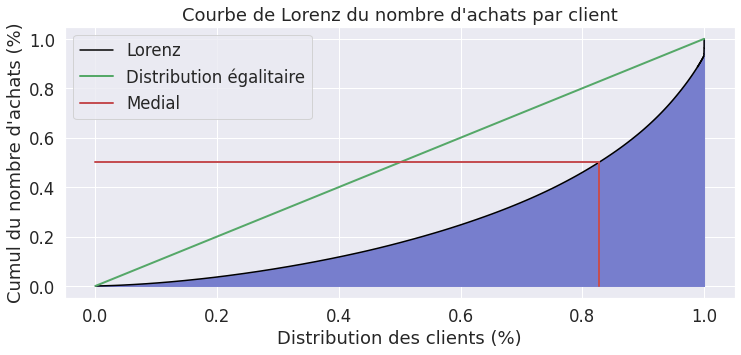

Coefficient de Gini= 0.5


In [18]:
graph_lorenz(varrs=nb_achat_client,title="Courbe de Lorenz du nombre d'achats par client",labelx="Distribution des clients (%)"
,labely="Cumul du nombre d'achats (%)",savenome="lorenz_nb_achat_client.png")

**Top 10 des clients par nombre d'achats**

In [19]:
classement_clients_nb_achats=df_clients_nachats.sort_values(by='nb_achats',ascending=False)
classement_clients_nb_achats.head(10)


,client_id,nb_achats
677,c_1609,12855
6337,c_6714,4473
2724,c_3454,3275
4388,c_4958,2562
1268,c_2140,195
7715,c_7959,195
7791,c_8026,193
1772,c_2595,193
3024,c_3725,190
7120,c_7421,189


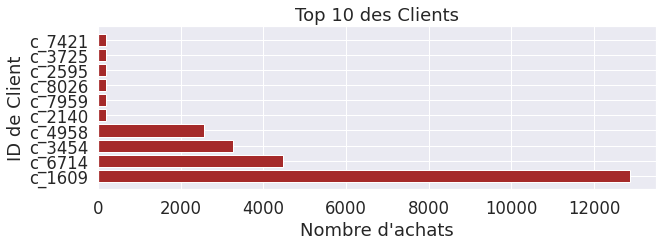

In [20]:
top10_clients_nb_achats =classement_clients_nb_achats.head(10)
top10_clients_nb_achats  = top10_clients_nb_achats .reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Clients')
plt.xlabel("Nombre d'achats")
plt.ylabel('ID de Client')
plt.barh(top10_clients_nb_achats.client_id,top10_clients_nb_achats.nb_achats, color='brown')
plt.savefig("Top10 Clients par Nombre d'Achat.png", bbox_inches='tight')
plt.show()

##2.4.2 Nombre d'achats par produit

In [21]:
# Création du df des produits et le nombre de leurs achats
df_produits_nachats=df_all[['id_prod', 'session_id']].groupby(['id_prod'], as_index=False).count()
df_produits_nachats=df_produits_nachats.rename(columns={'session_id':'nb_achats_prod'})
df_produits_nachats.head()

nb_achat_produit = df_produits_nachats['nb_achats_prod'].values

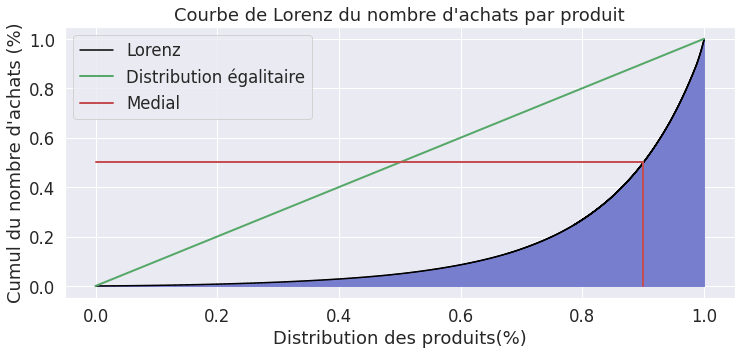

Coefficient de Gini= 0.69


In [22]:
graph_lorenz(varrs=nb_achat_produit,title="Courbe de Lorenz du nombre d'achats par produit",labelx="Distribution des produits(%)"
,labely="Cumul du nombre d'achats (%)",savenome="lorenz_nb_achat_produit.png")

**Top 10 des produits par nombre d'achats**

In [23]:
classement_produits_nb_achats=df_produits_nachats.sort_values(by='nb_achats_prod',ascending=False)
classement_produits_nb_achats.head(10)

,id_prod,nb_achats_prod
2591,1_369,1081
2644,1_417,1062
2733,1_498,1036
2641,1_414,1027
2653,1_425,1013
2622,1_398,952
2632,1_406,946
2640,1_413,944
2629,1_403,939
2633,1_407,933


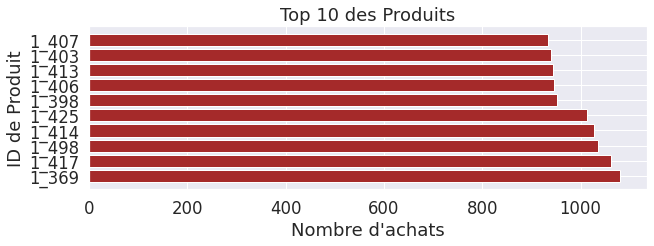

In [24]:
top10_produits_nb_achats =classement_produits_nb_achats.head(10)
top10_produits_nb_achats  = top10_produits_nb_achats .reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Produits')
plt.xlabel("Nombre d'achats")
plt.ylabel('ID de Produit')
plt.barh(top10_produits_nb_achats.id_prod,top10_produits_nb_achats.nb_achats_prod, color='brown')
plt.savefig("Top10 produits par Nombre d'Achat.png", bbox_inches='tight')
plt.show()

# <a name="#c6" > 2.5 Analyse de la Chiffre d’affaires CA (montant total des achats) 
</a>

## 2.5.1 Le chiffre d'affaire total CA

In [63]:
df_all['date']= pd.to_datetime(df_all['date'])
df_all.info()
ventes_all = df_all.loc[df_all['date'].notnull()]
CA = ventes_all['price'].sum()
print('Le chiffre d\'affaires est de {:.2f}€'.format(CA))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   price       336816 non-null  float64       
 5   categ       336816 non-null  string        
 6   sex         336816 non-null  string        
 7   birth       336816 non-null  int64         
 8   year        336816 non-null  int64         
 9   age         336816 non-null  int64         
 10  classe_age  336816 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4), string(2)
memory usage: 28.3+ MB
Le chiffre d'affaires est de 5797639.18€


In [64]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  object        
 3   client_id   336816 non-null  object        
 4   price       336816 non-null  float64       
 5   categ       336816 non-null  string        
 6   sex         336816 non-null  string        
 7   birth       336816 non-null  int64         
 8   year        336816 non-null  int64         
 9   age         336816 non-null  int64         
 10  classe_age  336816 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4), string(2)
memory usage: 28.3+ MB


## 2.5.2 Répartition du CA par catégorie de produits vendus

In [65]:
ventes_cat0 = ventes_all.loc[ventes_all['categ'] == '0']
ventes_cat1 = ventes_all.loc[ventes_all['categ'] == '1']
ventes_cat2 = ventes_all.loc[ventes_all['categ'] == '2']

CA0 = ventes_cat0['price'].sum()
CA1 = ventes_cat1['price'].sum()
CA2 = ventes_cat2['price'].sum()

print('Le chiffre d\'affaires pour la catégorie 0 est de {:.2f}€'.format(CA0))
print('Le chiffre d\'affaires pour la catégorie 1 est de {:.2f}€'.format(CA1))
print('Le chiffre d\'affaires pour la catégorie 2 est de {:.2f}€'.format(CA2))

Le chiffre d'affaires pour la catégorie 0 est de 2230784.07€
Le chiffre d'affaires pour la catégorie 1 est de 2247384.41€
Le chiffre d'affaires pour la catégorie 2 est de 1319470.71€


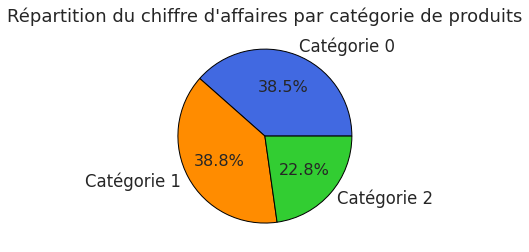

In [66]:
plt.figure()
plt.title('Répartition du chiffre d\'affaires par catégorie de produits')
slices = [CA0, CA1, CA2]
labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
colors = ['royalblue', 'darkorange', 'limegreen']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Répartition_CA_categs.png', bbox_inches='tight')
plt.show()

## 2.5.3 Répartition du CA par sexe de clients acheteurs


In [67]:
df_all['sex'].unique()

<StringArray>
['f', 'm']
Length: 2, dtype: string

In [68]:
ventes_femme = ventes_all.loc[ventes_all['sex'] == 'f']
ventes_homme = ventes_all.loc[ventes_all['sex'] == 'm']


CA_f = ventes_femme['price'].sum()
CA_h = ventes_homme['price'].sum()


print('Le chiffre d\'affaires pour les clients hommes {:.2f}€'.format(CA_h))
print('Le chiffre d\'affaires pour les clients femmes{:.2f}€'.format(CA_f))

part_CA_f=(CA_f/CA)*100
part_CA_h=(CA_h/CA)*100

print('Le chiffre d\'affaires des clients de sexe féminin: {:.2f}%'.format(part_CA_f))
print('Le chiffre d\'affaires des clients de sexe masculin: {:.2f}%'.format(part_CA_h))

Le chiffre d'affaires pour les clients hommes 2937899.12€
Le chiffre d'affaires pour les clients femmes2859740.07€
Le chiffre d'affaires des clients de sexe féminin: 49.33%
Le chiffre d'affaires des clients de sexe masculin: 50.67%


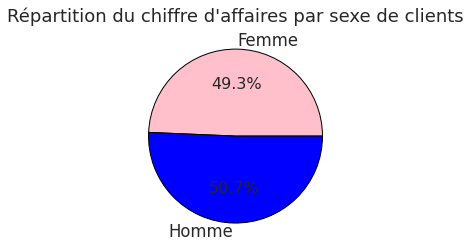

In [69]:
plt.figure()
plt.title('Répartition du chiffre d\'affaires par sexe de clients')
slices = [CA_f, CA_h]
labels = ['Femme','Homme']
colors = [ 'pink','blue']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Répartition_CA_sexe.png', bbox_inches='tight')
plt.show()

## 2.5.4 Répartition de CA par produit

In [70]:
CA_produits = pd.DataFrame(ventes_all.groupby('id_prod') ['price'].sum())

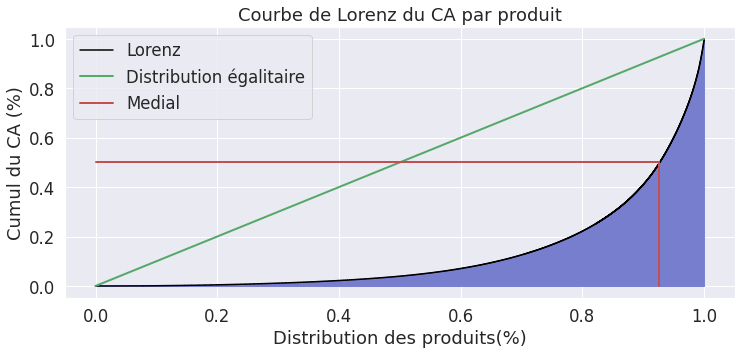

Coefficient de Gini= 0.74


In [71]:
graph_lorenz(varrs=CA_produits.price,title="Courbe de Lorenz du CA par produit",labelx="Distribution des produits(%)"
,labely="Cumul du CA (%)",savenome="lorenz_CA_produit.png")

**Top 10 des produits par contribution to CA**

In [72]:
classement_produits=CA_produits.sort_values(by='price',ascending=False)
classement_produits.head(10)

,price
id_prod,
2_135,33874.09
2_112,31960.61
2_102,28919.46
2_209,27296.10
2_110,27016.50
1_369,25933.19
1_395,25830.09
2_166,25534.44
2_43,25266.39


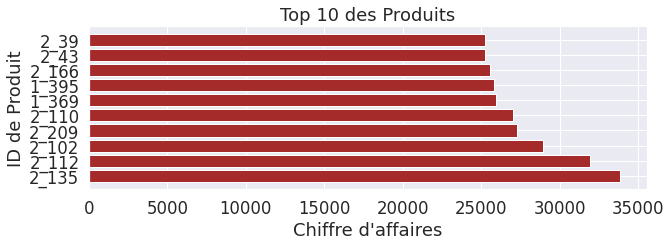

In [73]:
top10_produits = classement_produits.head(10)
top10_produits = top10_produits.reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des Produits')
plt.xlabel("Chiffre d'affaires")
plt.ylabel('ID de Produit')
plt.barh(top10_produits.id_prod,top10_produits.price, color='brown')
plt.savefig('Top10 produits par CA.png', bbox_inches='tight')
plt.show()

## 2.5.5 Répartition de CA par client

In [74]:
CA_clients = pd.DataFrame(ventes_all.groupby('client_id') ['price'].sum())


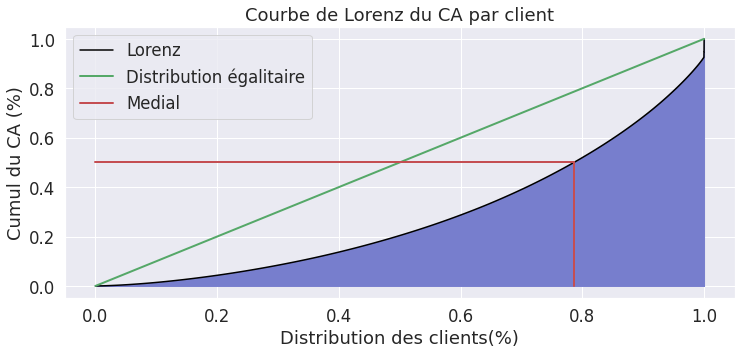

Coefficient de Gini= 0.44


In [75]:
graph_lorenz(varrs=CA_clients.price,title="Courbe de Lorenz du CA par client",labelx="Distribution des clients(%)"
,labely="Cumul du CA (%)",savenome="lorenz_CA_client.png")

**Top 10 des clients contributed to CA**

In [76]:
classement_clients=CA_clients.sort_values(by='price',ascending=False)
classement_clients.head(10)

,price
client_id,
c_1609,162007.340
c_4958,144257.210
c_6714,73217.950
c_3454,54463.530
c_7959,2564.250
c_8026,2547.975
c_4491,2540.530
c_2140,2527.010
c_8392,2515.980


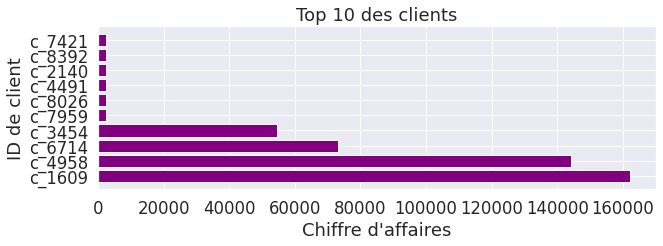

In [77]:
top10_clients = classement_clients.head(10)
top10_clients = top10_clients.reset_index()
plt.figure(figsize=(10,3))
plt.title('Top 10 des clients')
plt.xlabel("Chiffre d'affaires")
plt.ylabel('ID de client')
plt.barh(top10_clients.client_id,top10_clients.price, color='purple')
plt.savefig('Top10 clients.png', bbox_inches='tight')
plt.show()

##2.5.6 L'evolution temporelle de CA & CA par catégorie 

In [78]:
print(df_all['date'].min())
print(df_all['date'].max())

2021-03-01 00:01:07.843138
2022-02-28 23:59:58.040472


In [79]:
CA_temp = ventes_all.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_cat0 = ventes_cat0.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_cat1 = ventes_cat1.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_cat2 = ventes_cat2.groupby(pd.Grouper(key='date', freq='D')).sum()

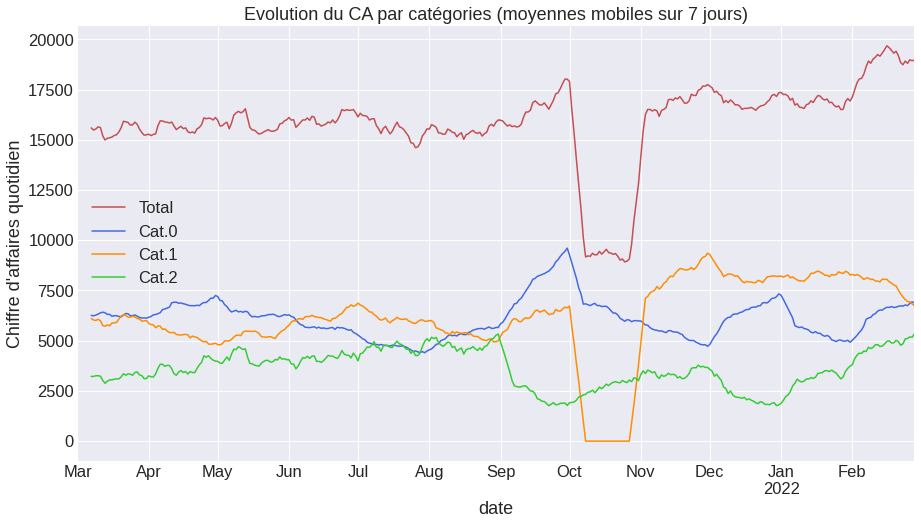

In [85]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA par catégories (moyennes mobiles sur 7 jours)')
plt.ylabel('Chiffre d\'affaires quotidien')
CA_temp['price'].rolling(window=7).mean().plot(color='k')
CA_temp_cat0['price'].rolling(window=7).mean().plot(color='royalblue')
CA_temp_cat1['price'].rolling(window=7).mean().plot(color='darkorange')
CA_temp_cat2['price'].rolling(window=7).mean().plot(color='limegreen')
plt.legend(['Total', 'Cat.0', 'Cat.1', 'Cat.2'])
plt.savefig('Evolution CA-Cat.png', bbox_inches='tight')
plt.show()

<font color='red'>
CA diminué en octobre 2021, pourquoi? </font>
<font color='green'>des produits de la catégorie 1 a prix nul en octobre 2021. arret de vente ?!


In [87]:
arret_ventes = CA_temp_cat1.loc[CA_temp_cat1['price']==0].sort_values('date')
print('date du debut de repture de ventes en categ1',arret_ventes.index.min())
print('date du fin de repture de ventes en categ1',arret_ventes.index.max())

date du debut de repture de ventes en categ1 2021-10-02 00:00:00
date du fin de repture de ventes en categ1 2021-10-27 00:00:00


##2.5.7 Évolution temporelle CA par sexe

In [88]:
CA_temp = ventes_all.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_femmes = ventes_femme.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_hommes = ventes_homme.groupby(pd.Grouper(key='date', freq='D')).sum()


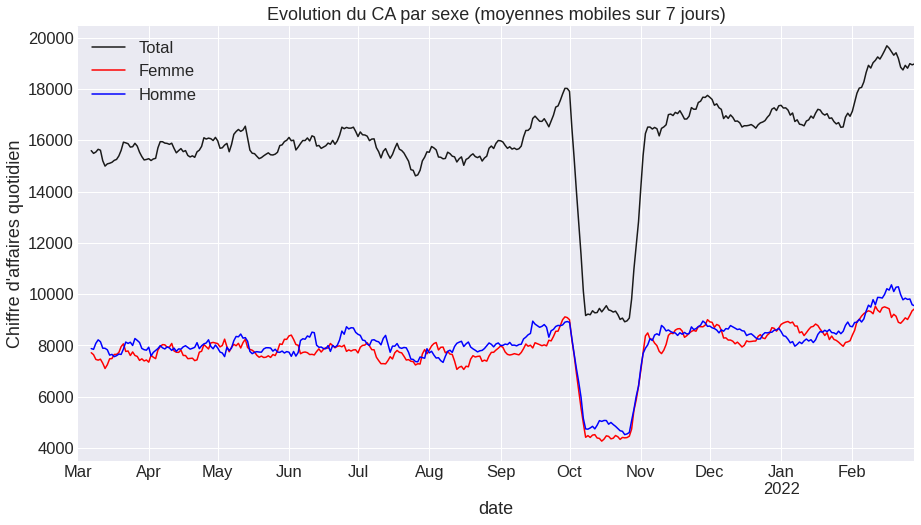

In [90]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA par sexe (moyennes mobiles sur 7 jours)')
plt.ylabel('Chiffre d\'affaires quotidien')
CA_temp['price'].rolling(window=7).mean().plot(color='k')
CA_temp_femmes['price'].rolling(window=7).mean().plot(color='red')
CA_temp_hommes['price'].rolling(window=7).mean().plot(color='blue')
plt.legend(['Total', 'Femme','Homme'])
plt.savefig('Evolution CA-sex.png', bbox_inches='tight')
plt.show()

<font color='red'>
CA by clients femmes & hommes a diminué en octobre 2021. pourquoi?</font> ventes arretes des produits de categ1

##2.5.8 Evolution temporelle CA par classe d'age

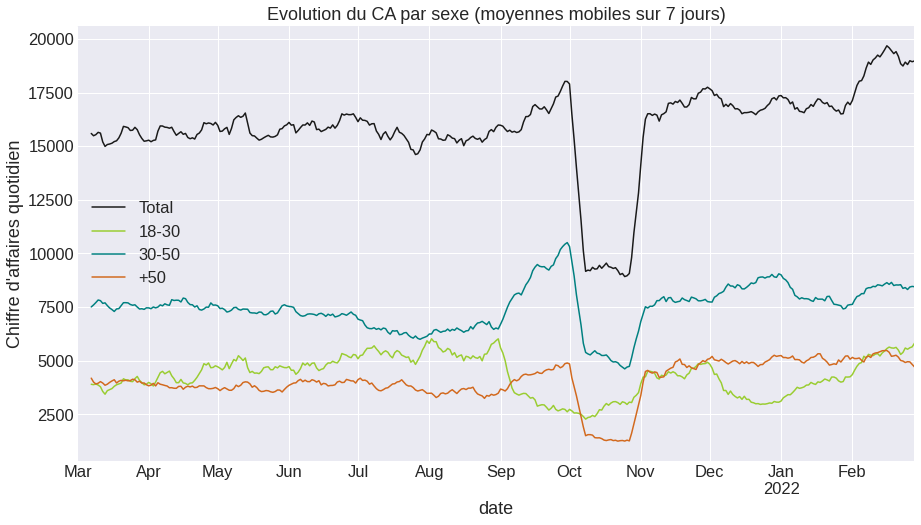

In [92]:
ventes_age_18_30 = ventes_all.loc[ventes_all['classe_age'] == '18-30']
ventes_age_30_50 = ventes_all.loc[ventes_all['classe_age'] == '30-50']
ventes_age_plus50  = ventes_all.loc[ventes_all['classe_age'] == '+50']

CA_temp = ventes_all.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_age_18_30 = ventes_age_18_30.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_age_30_50 = ventes_age_30_50.groupby(pd.Grouper(key='date', freq='D')).sum()
CA_temp_age_plus50 = ventes_age_plus50 .groupby(pd.Grouper(key='date', freq='D')).sum()


plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA par sexe (moyennes mobiles sur 7 jours)')
plt.ylabel('Chiffre d\'affaires quotidien')
CA_temp['price'].rolling(window=7).mean().plot(color='k')
CA_temp_age_18_30['price'].rolling(window=7).mean().plot(color='yellowgreen')
CA_temp_age_30_50['price'].rolling(window=7).mean().plot(color='teal')
CA_temp_age_plus50['price'].rolling(window=7).mean().plot(color='chocolate')

plt.legend(['Total','18-30','30-50','+50'])
plt.savefig('Evolution CA-classeAge.png', bbox_inches='tight')
plt.show()



<font color='red'>
CA by clients agées de plus de 30 ans   a diminué en octobre 2021. pourquoi?</font> ventes arretes des produits de categ1


# 3. Analyse Bi-variés

**test de normalité**

In [80]:
def tst_normal (df,colonnes):
    df_ok= df.dropna()
    for i,colonne in enumerate(colonnes):
        tst= st.shapiro(df_ok[colonne]) # normale
        if tst.pvalue<0.05:
            print(f'La distribution de {colonne} est normale')
            
        else:
            print(f'La distribution de {colonne} n\'est pas normale')
            

In [81]:
list_quantis=['price','age']
tst_normal(df_all,list_quantis)

La distribution de price est normale
La distribution de age est normale


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 3.4 Age/ Montants d'achats total (CA)

In [82]:
CA_par_client = pd.DataFrame(df_all.groupby(['age'])['price'].sum())
CA_par_client.reset_index(inplace=True)


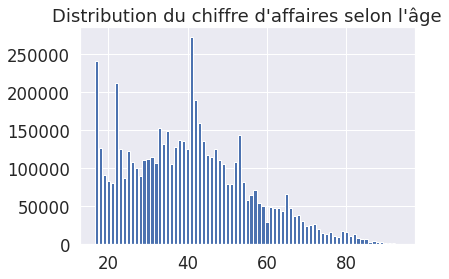

In [83]:
plt.figure()
plt.title("Distribution du chiffre d'affaires selon l'âge")
plt.bar(CA_par_client.age, CA_par_client.price)
plt.show()

In [84]:
#f, ax = plt.subplots(figsize=(12, 9))
##_____________________________
# calculations of correlations
##corrmat = df_all.dropna(how='any').corr()
##________________________________________
#k = 10 # number of variables for heatmap
#cols = corrmat.nlargest(k, 'num_voted_users')['num_voted_users'].index
#cm = np.corrcoef(df_all[cols].dropna(how='any').values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 #fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 #yticklabels=cols.values, xticklabels=cols.values)
#f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
#plt.show()